In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

# <center> Matplotlib

Matplotlib – одна из самых популярных библиотек Python для визуализации данных.

Импорт: import matplotlib.pyplot as plt

Документация: https://matplotlib.org/contents.html

Text(0.5, 0, 'ось ОХ')

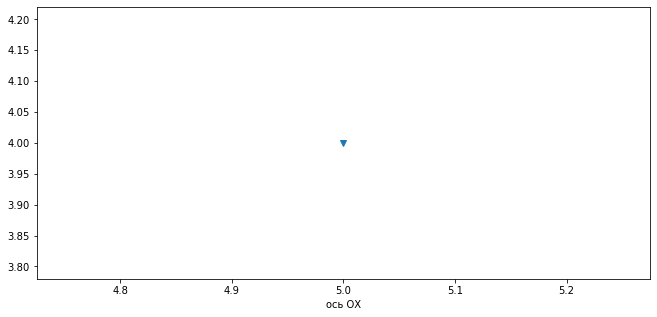

In [3]:
# первый позиционный аргумент – точки по Y, второй – точки по X. По-умолчанию это единичные отрезки
plt.plot(5, 4, marker='v')
plt.xlabel('ось ОХ')
# plt.show()

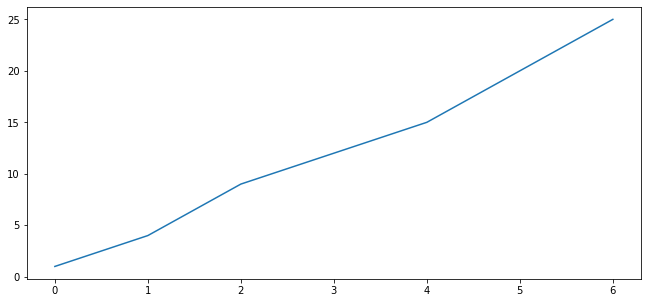

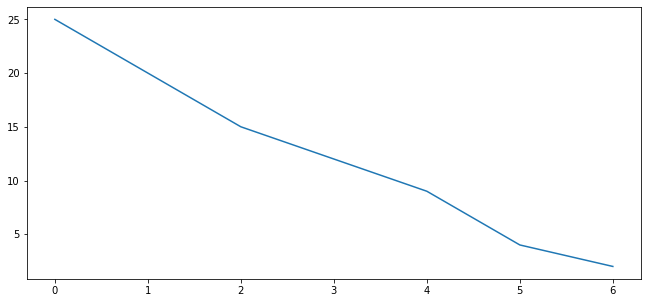

In [4]:
plt.plot([1, 4, 9, 12, 15, 20, 25])
plt.show()
plt.plot([25, 20, 15, 12, 9, 4, 2])

Поработаем с данными о продажах и оценках видеоигр с [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')

In [6]:
print(df.shape)

(16719, 16)


In [7]:
df.info()
# что видим?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [8]:
# почему в User_Score object?
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
df['User_Score'].replace('tbd', np.NaN, inplace=True)

In [11]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# переведем для порядка годы к integer
df['Year_of_Release'] = df.Year_of_Release.astype('Int64')
df['User_Count'] = df.User_Count.astype('Int64')
df['Critic_Count'] = df.Critic_Count.astype('Int64')
df['Critic_Score'] = df.Critic_Score.astype('Float64')
df['User_Score'] = df.User_Score.astype('Float64')

# переводим оценки в один формат
df['User_Score'] = df['User_Score'] * 10

In [13]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,71.250461,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,15.000061,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,64.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,75.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,82.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,97.000000,10665.000000


## График
Построим график динамики продаж видеоигр

In [ ]:
dynamics_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales','Publisher', 'Year_of_Release']]\
    .groupby(['Year_of_Release']).sum()
dynamics_by_region.head(10)

In [ ]:
# применяем функцию plot из matplotlib
# для каждой дополнительной настройки есть своя функция
plt.plot(dynamics_by_region.index, dynamics_by_region['Global_Sales'])
plt.title('Динамика продаж видеоигр')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')

In [ ]:
# можем использовать цикл, чтобы построить графики для каждого региона
for region in [x for x in df.columns if 'Sales' in x]:
    plt.plot(dynamics_by_region.index, dynamics_by_region[region])
    plt.title('Динамика продаж видеоигр')
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн.') 
plt.legend(dynamics_by_region)

Метод .plot() в pandas основан на matplotlib. Если мы работаем с датафреймами, то это, как правило, более удобный вариант, чем использование matplotlib самой по себе. Мы сконцентрируемся на этом варианте.

Документация: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [ ]:
# если работает с табличными структурами, то можем воспользоваться функционалом, 
# встроенным в pandas. Так удобнее
# Метод plot по-умолчанию использует индекс датафрейма для оси Y
# метод plot по-умолчанию строит график
ax = dynamics_by_region['Global_Sales'].plot(title='Динамика продаж видеоигр')
#                                        , xlabel='Год', 
#                                         ylabel='Продажи, млн.')
ax.xlabel('Год_')
ax.ylabel('Сумма продаж_')





In [ ]:
for x in df.columns:
    if 'Sales' in x:
        print(x)

In [ ]:
# plot без цикла построит графики для каждого региона (столбца)
# если у plot нету нужных методов, то можно применить функции matplotlib
dynamics_by_region.plot(title='Динамика продаж видеоигр')
#                              xlabel='Год', 
#                              ylabel='Продажи, млн.')
plt.xlabel('Год_')
plt.ylabel('Сумма продаж_')

plt.text(2007, 680, 'Почему отсюда начался спад?')  
plt.legend(loc='upper left')

## Area chart

In [ ]:
# по-умолчанию  Area chart всегда накопительный
dynamics_by_region.drop('Global_Sales', axis=1).plot(kind='area',
                             title='Динамика продаж видеоигр'
                             ,      stacked=False
                             )
#                              xlabel='Год', 
# #                                 stacked=False,
#                              ylabel='Продажи, млн.')

plt.xlabel('Год_')
plt.ylabel('Сумма продаж_')

# Гистограммы

In [ ]:
import numpy as np
# распределение оценок пользователей
df['User_Score'].plot(kind='hist', 
                   title='User Score distribution'
#                    xlabel='User score',
#                    ylabel='Games'
                    ,alpha = 0.5
                    ,density = True
                     )

plt.xlabel('User score')
plt.ylabel('Games')
# сравнение
# df.Critic_Score.plot(kind='hist', 
#                      title='Critic Score distribution',
#                      xlabel='Critic score',
#                      ylabel='Games',
#                      alpha = 0.5,
#                      density = True)

# df.User_Score.plot(kind='hist', 
#                      title='User Score distribution',
#                      xlabel='User score',
#                      ylabel='Games',
#                      alpha = 0.5,
#                      density = True)

In [ ]:
# распределение оценок критиков
df['Critic_Score'].plot(kind='hist', 
                     title='Critic Score distribution',
                     xlabel='Critic score',
                     ylabel='Games')

## Столбчатая диаграмма

In [ ]:
# количество игр в разрезе платформ
games_by_platforms = df[['Name', 'Platform']].groupby('Platform').count()
games_by_platforms.head(10)

In [ ]:
games_by_platforms.loc[['PC', 'X360', 'PS3', 'PS4', 'XOne']].plot(kind='bar', 
                                                                  title='Platforms by Games'
#                                                                   ,xlabel='Platforms'
#                                                                   ,ylabel='Games quantity'
                                                                 )
plt.xlabel('Platforms')
plt.ylabel('Games quantity')


In [ ]:
top5_genres.values

In [ ]:
# топ-5 жанров по продажам
top5_genres = df[['Global_Sales', 'Genre']].groupby('Genre').sum().sort_values('Global_Sales', ascending=False).head(5)
top5_genres.plot(kind='bar')
for i, val in enumerate(top5_genres.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

In [ ]:
# динамика продаж в разрезе регионов. Выглядит фигово
dynamics_by_region.plot(kind='bar')

In [ ]:
# Сделаем с накоплением!
dynamics_by_region.drop('Global_Sales', axis=1).plot(kind='bar', stacked=True)

## Круговая диаграмма

In [ ]:
# количество игр по платформам
pie_data = df['Platform'].value_counts()
pie_data.plot(kind='pie', title='Quantity of games by platforms')

In [ ]:
# количество игр по платформам (берем только топ-5)
top_platforms = df['Platform'].value_counts().sort_values(ascending = False).head(5)
top_platforms.plot(kind='pie')
plt.legend()

## Boxplot

In [ ]:
# очень хорошо подходит для поиска выбросов!
df['User_Score'].plot(kind='box',
                   title='User Score distribution', grid=True)

In [ ]:
df[['User_Score', 'Critic_Score']].plot(kind='box',
                                        title='Score distributionn')

## Точечная диаграмма

In [ ]:
# посмотрим на взимосвязь оценок и продаж
df.plot(kind='scatter', 
        x='User_Score', 
        y='Global_Sales', 
        title='Correlation between Global Sales and User Score')
plt.show()
df.plot(kind='scatter', 
        x='Critic_Score', 
        y='Global_Sales', 
        title='Correlation between Global Sales and Critic Score')

In [ ]:
# добавим третью ось
df.plot(kind='scatter', 
        x='User_Score', 
        y='Critic_Score', 
        s=df['Global_Sales']*20,
        title='Correlation between Global Sales and User Score',
       )

## Стилизация таблиц

In [ ]:
# выведем информацию о топ-10 издателях по продажам
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

In [ ]:
top_developers_df.style.bar(align='mid')